<a href="https://colab.research.google.com/github/Rachel-0420/Cross-Entropy-Fast-Transient/blob/Normal-Distributions/HighD%20Normal%20Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Shifted

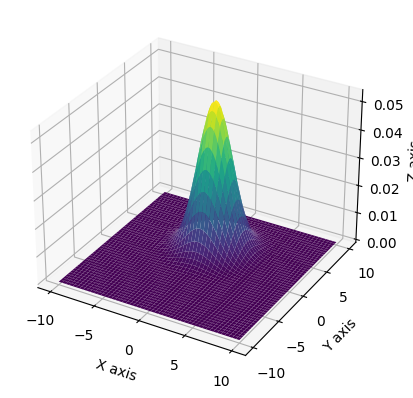

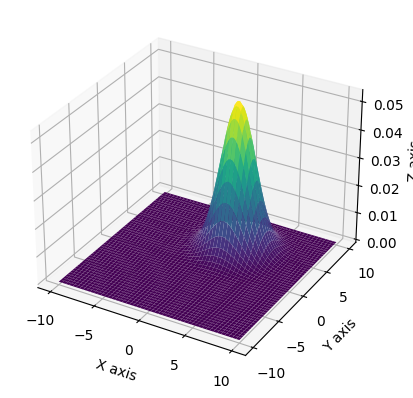

(68.17439399815298, 63.03867741763216)


In [34]:
H_x12 = []
H_y12 = []

ref_1, ref_2 = 0, 0

mu_x1, mu_y1 = 0, 3
mu_x2, mu_y2 = 2, 4

variance = 3

x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

func_1 = multivariate_normal([mu_x1, mu_y1], [[variance, 0], [0, variance]])
func_2 = multivariate_normal([mu_x2, mu_y2], [[variance, 0], [0, variance]])

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_1.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_2.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# projections
pdf_x1 = norm.pdf(x, mu_x1, variance)
pdf_y1 = norm.pdf(y, mu_y1, variance)
pdf_x2 = norm.pdf(x, mu_x2, variance)
pdf_y2 = norm.pdf(y, mu_y2, variance)

for i in range(len(pdf_x1)):
  H_x12.append(- pdf_x1[i] * math.log(pdf_x2[i]))
  H_y12.append(- pdf_y1[i] * math.log(pdf_y2[i]))
  ref_1 += H_x12[i]
  ref_2 += H_y12[i]

# ref is the 'integral' of cross entropy
print((ref_1, ref_2))

Different variance

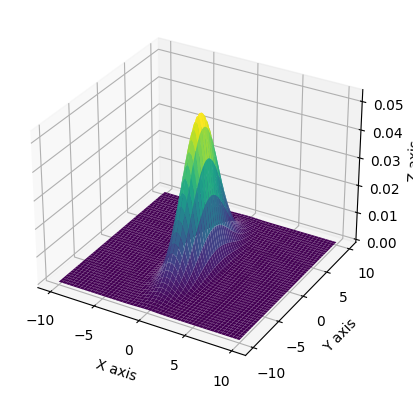

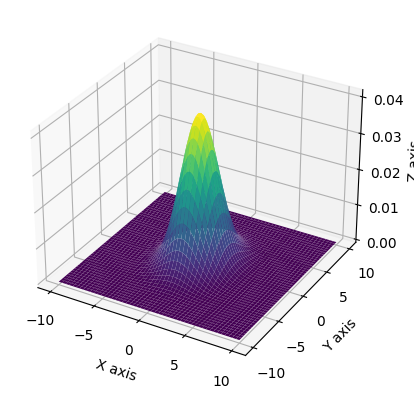

(51.72400411683701, 56.69624937074881)


In [35]:
H_x34 = []
H_y34 = []

ref_3, ref_4 = 0, 0

mu = 0
variance_x3, variance_y3 = 1, 9
variance_x4, variance_y4 = 3, 5

func_3 = multivariate_normal([mu, mu], [[variance_x3, 0], [0, variance_y3]])
func_4 = multivariate_normal([mu, mu], [[variance_x4, 0], [0, variance_y4]])

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_3.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_4.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# projections
pdf_x3 = norm.pdf(x, mu, variance_x3)
pdf_y3 = norm.pdf(y, mu, variance_y3)
pdf_x4 = norm.pdf(x, mu, variance_x4)
pdf_y4 = norm.pdf(y, mu, variance_y4)

for i in range(len(pdf_x1)):
  H_x34.append(- pdf_x3[i] * math.log(pdf_x4[i]))
  H_y34.append(- pdf_y3[i] * math.log(pdf_y4[i]))
  ref_3 += H_x34[i]
  ref_4 += H_y34[i]

# ref is the 'integral' of cross entropy
print((ref_3, ref_4))